In [ ]:
# Importing libraries matplotlib and seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
dataset = pd.read_csv('car_data.csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
dataset = dataset.drop(['User ID'], axis=1)

In [ ]:
# dataset.replace(('Male', 'Female'), (1, 0), inplace=True)

In [ ]:
# Extract text features
cats = dataset.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   dataset[col] = dataset[col].astype('category')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Gender        1000 non-null   category
 1   Age           1000 non-null   int64   
 2   AnnualSalary  1000 non-null   int64   
 3   Purchased     1000 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 24.7 KB


In [ ]:
X = dataset.drop(['Purchased'],axis=1)
y = dataset['Purchased']

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# y = encoder.fit_transform(y)
# print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

ValueError: ignored

In [ ]:
#Plot the tree
plt.figure(figsize=(12,6))

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [ ]:
#Predict the values
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
#Predict the value using X train for accuracy comparision
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

In [ ]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 100

In [ ]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

In [ ]:
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   early_stopping_rounds=1
)

[0]	train-rmse:0.38741	validation-rmse:0.39023
[1]	train-rmse:0.31329	validation-rmse:0.32157
[2]	train-rmse:0.26606	validation-rmse:0.28542
[3]	train-rmse:0.23431	validation-rmse:0.26041
[4]	train-rmse:0.21334	validation-rmse:0.24630
[5]	train-rmse:0.20007	validation-rmse:0.24065
[6]	train-rmse:0.19126	validation-rmse:0.23881
[7]	train-rmse:0.18158	validation-rmse:0.23797
[8]	train-rmse:0.17651	validation-rmse:0.23736
[9]	train-rmse:0.17029	validation-rmse:0.23807


In [ ]:
results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.385247,0.002058,0.400887,0.006956
1,0.309219,0.004090,0.342747,0.014404
2,0.259038,0.004853,0.312557,0.018313
3,0.227140,0.004844,0.297571,0.018943
4,0.205496,0.006064,0.290660,0.021339


In [ ]:
best_rmse = results['test-rmse-mean'].min()

best_rmse

0.2877162298329981

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

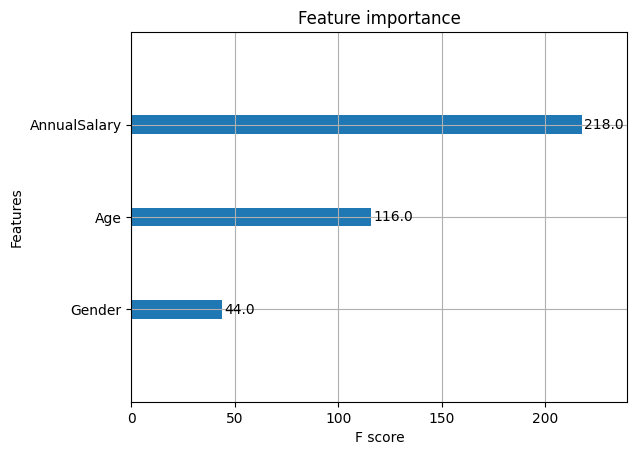

In [ ]:
xgb.plot_importance(model)

<Axes: >

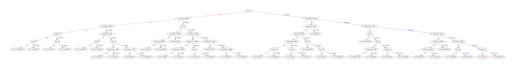

In [ ]:
xgb.plot_tree(model, num_trees=6)